데이터 및 코드: https://github.com/datascienceabe/study_open/tree/master/Linear_Regression

출처: Montgomery, D. C., Peck, E. A., & Vining, G. G. (2012). Introduction to linear regression analysis (Vol. 821). John Wiley & Sons.<br>
데이터: http://bcs.wiley.com/he-bcs/Books?action=resource&bcsId=9068&itemId=0470542810&resourceId=36322

8장<br>
목차<br>
1. Indicator Variables
2. Interaction Effect

# 1. Indicator Variables

predictor에 범주형 변수가 있을 때 사용<br>
$x_{2}=0, type A$,$x_{2}=1, type B$<br>
범주 중 어떤 것을 0으로 둘지는 자유<br>

$y=\beta_{0}+\beta_{1}x_{1}+\beta_{2}x_{2}+\epsilon$<br>
<br>
범주 A 일때<br>
$y=\beta_{0}+\beta_{1}x_{1}+\epsilon$<br>
범주 B 일때<br>
$y=(\beta_{0}+\beta_{2})+\beta_{1}x_{1}+\epsilon$<br>
=> 둘의 차이는 $\beta_{2}$, variance도 같음

In [1]:
setwd('C:/Users/bki19/desktop/Linear_Regression/data')

In [5]:
df<-read.csv('./Tool_Life.csv')
colnames(df)<-c('y','x','Type')
df2<-df
df2[,'Type']<-ifelse(df[,'Type']=='A',0,1)

The Tool Life Data<br>
절단용 기계 종류(Type)에 따른 의 속도 (x)와 수명 시간(y)<br>
$y=\beta_{0}+\beta_{1}x_{1}+\beta_{2}x_{2}+\epsilon$

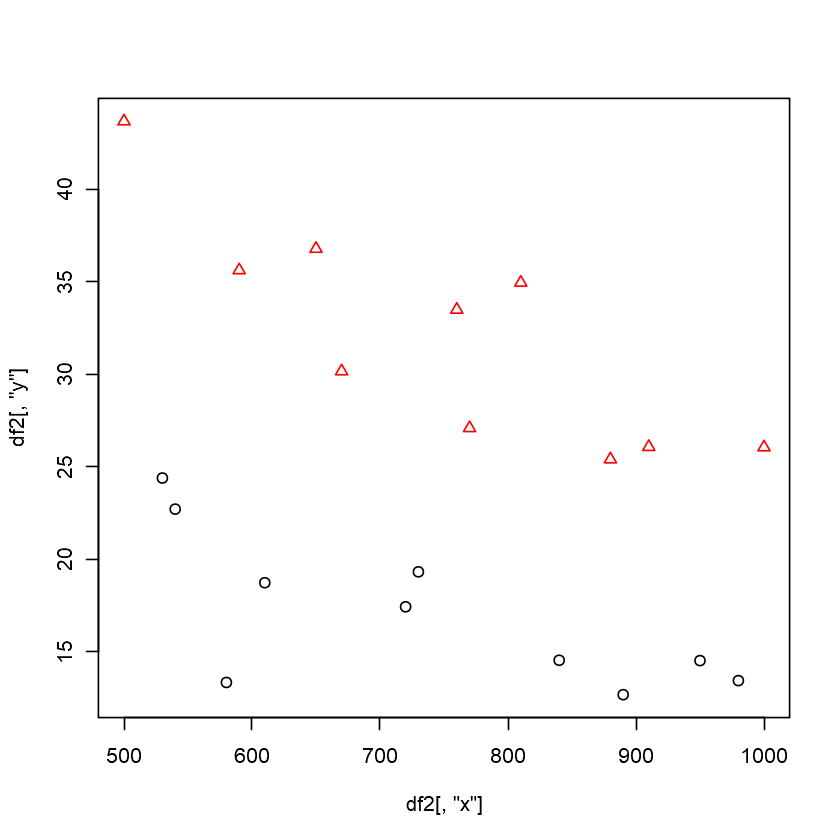

In [6]:
plot(df2[,'x'],df2[,'y'],pch=(df2[,'Type']+1),col=(df2[,'Type']+1) )

검정이 A, 빨강이 B로 카테고리별로 선형성이 보임

In [7]:
fit<-lm(y~.,data=df)

In [8]:
summary(fit)


Call:
lm(formula = y ~ ., data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.6255 -1.6308  0.0612  2.2218  5.5044 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 35.208726   3.738882   9.417 3.71e-08 ***
x           -0.024557   0.004865  -5.048 9.92e-05 ***
TypeB       15.235474   1.501220  10.149 1.25e-08 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.352 on 17 degrees of freedom
Multiple R-squared:  0.8787,	Adjusted R-squared:  0.8645 
F-statistic:  61.6 on 2 and 17 DF,  p-value: 1.627e-08


$\hat{y}=35.209-0.0246x_{1}+15.004x_{2}$<br>
F test에 대한 p-value가 매우 낮은 걸로 보아 모형은 유의하고, T test로 계수들을 보면 모두 유의하여 모든 regressor 들이 모형에 기여<br>
B2의 회귀계수가 유의한것으로 보아, typeA에서 typeB로 바꾸는 것은 평균 tool life를 증가 시키는 것이 95% 정도로 확신

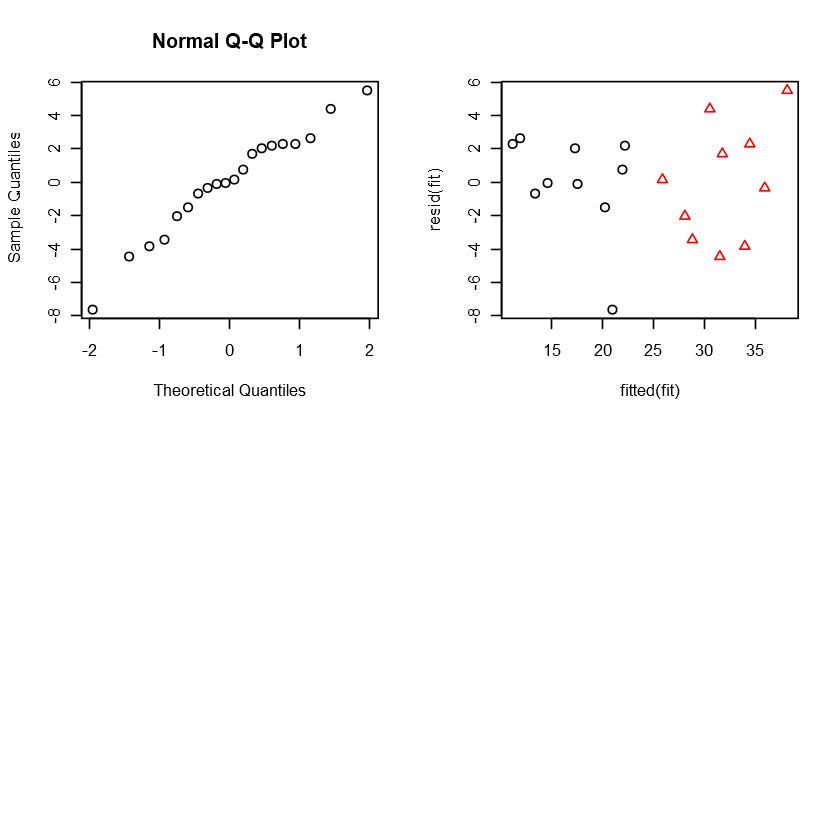

In [9]:
par(mfrow=c(2,2))
qqnorm(resid(fit)) 
plot(fitted(fit),resid(fit) ,pch=(df2[,'Type']+1),col=(df2[,'Type']+1)  )

Normality 봤을 때 거의 normal<br>
Residual plot 봤을 때 error의 constant variance가 두 집단이 달라 보임<br>
->Inequality of Constant variance problem 존재 가능성<br>

Indicator 없이 두 집단 마다 다른 직선을 적합시키면 어떨까? 
- 이 방법은 두 개의 결과 함수가 나온 다는 점과 두 데이터를 합쳐야 되는 당위성을 잃기 때문에 선호 되지 않음<br>
- 또한 error의 variance에 대해 두 가지 추정량이 존재하고 자유도를 더 잃음
- 따라서 한 개의 모델을 만드는 것을 선호해야 함

# 2. Interaction Effect

그렇다면 두 집간의 y와 x의 관계가 다른 경우 어떻게 할까?

$y=\beta_{0}+\beta_{1}x_{1}+\beta_{2}x_{2}+\beta_{3}x_{1}x_{2}+\epsilon$<br>
<br>
범주 A 일때<br>
$y=\beta_{0}+\beta_{1}x_{1}+\epsilon$<br>
범주 B 일때<br>
$y=(\beta_{0}+\beta_{2})+(\beta_{1}+\beta_{3})x_{1}+\epsilon$<br>
=> 둘의 차이는 intercept는 $(\beta_{0}+\beta_{2})$, constant는 $(\beta_{1}+\beta_{3})$

사실상 두개의 다른 회귀 모형을 적합 시키는 것과 같음<br>
가설 검정시 바로 extra-sum-of squares 방법을 사용할 수 있음

예를들어 두 회귀 모형이 같은지 검정하려면 <br>
$H_{0}: \beta_{0}=\beta_{1}=0$인지 테스트해야 하지만<br>
만약 $H_{0}$을 기각하지 못해 두 회귀 모형이 다를 때 같은 slop를 같으면서 다른 intercept를 갖는지 테스트하려면<br>
단순히 $H_{0}: \beta_{3}=0$만 테스트하면 됨


In [16]:
fit2<-lm(y~x+x*Type,data=df2)

In [17]:
summary(fit2)


Call:
lm(formula = y ~ x + x * Type, data = df2)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.5534 -1.7088  0.3283  2.0913  4.8652 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 30.176013   4.724895   6.387 9.01e-06 ***
x           -0.017729   0.006262  -2.831  0.01204 *  
Type        26.569340   7.115681   3.734  0.00181 ** 
x:Type      -0.015186   0.009338  -1.626  0.12345    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.201 on 16 degrees of freedom
Multiple R-squared:  0.8959,	Adjusted R-squared:  0.8764 
F-statistic: 45.92 on 3 and 16 DF,  p-value: 4.37e-08


In [13]:
anova(lm(y~x,data=df2),fit2)
anova(fit2)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
18,1348.056,NA,NA,NA,NA
16,163.893,2,1184.163,57.80173,4.773332e-08


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
x,1,227.03260,227.03260,22.163977,2.370008e-04
Type,1,1157.07580,1157.07580,112.959117,1.169088e-08
x:Type,1,27.08675,27.08675,2.644334,1.234509e-01
Residuals,16,163.89304,10.24331,NA,NA


두 모형이 같은지 $H_{0}: \beta_{0}=\beta_{1}=0$ 테스트했을 때<br>
$F_{0}=57.80$으로 기각하여 두 모형은 같지 않음<br>
두 모형이 다른 intercept를 같으면서 같은 slope를 갖는지$H_{0}: \beta_{3}=0$ 테스트 했을 때<br>
$T_{0}=-1.626$으로 기각 못해 두 slope는 같음